In [51]:
#Data import
import urllib.request
import base64
import requests
import scipy.sparse  
from scipy.sparse import csr_matrix  
import json
import io
from urllib.request import urlopen
import csv
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os
import json
import gzip
import csv
import string
import urllib
import matplotlib.pyplot as plt
#Data pre-processing
import pandas_profiling as pp

#Data Viz
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
import folium
import datetime
from datetime import datetime, date, time
import pandas as pd
import seaborn as sns
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV 
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_selection import SelectFromModel

In [52]:
df = pd.read_csv('pulsar_stars.csv')
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [53]:
df.isnull().any()

 Mean of the integrated profile                  False
 Standard deviation of the integrated profile    False
 Excess kurtosis of the integrated profile       False
 Skewness of the integrated profile              False
 Mean of the DM-SNR curve                        False
 Standard deviation of the DM-SNR curve          False
 Excess kurtosis of the DM-SNR curve             False
 Skewness of the DM-SNR curve                    False
target_class                                     False
dtype: bool

In [54]:
df.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

In [55]:
df.columns
df[]

SyntaxError: invalid syntax (<ipython-input-55-e5a024d26f2c>, line 2)

In [ ]:
df['target_class'].unique()

In [ ]:
plt.matshow(df.corr(), cmap='viridis')
plt.colorbar()

In [56]:
# X = df.select_dtypes(include= 'float64')
X = df[[' Excess kurtosis of the integrated profile',' Skewness of the integrated profile']]
y = df['target_class']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.9, random_state=1)

In [57]:
model = svm.SVC(kernel='linear', C=1, gamma=1) 

In [58]:
reg = model.fit(X_train,y_train)
y_pred = model.predict(X)
print('Score train set: {0:.2f}'.format(model.score(X_train,y_train)))
print('Score test set: {0:.2f}'.format(model.score(X_test,y_test)))


Score train set: 0.97
Score test set: 0.98


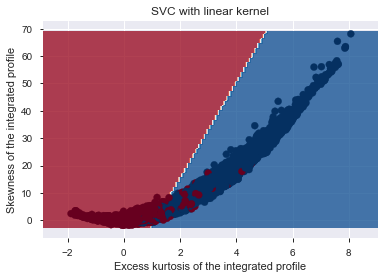

In [59]:
plt.subplot(1, 1, 1)
x_min, x_max = X[' Excess kurtosis of the integrated profile'].min() - 1, X[' Excess kurtosis of the integrated profile'].max() + 1
y_min, y_max = X[' Skewness of the integrated profile'].min() - 1, X[' Skewness of the integrated profile'].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.1),np.arange(y_min, y_max,0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[' Excess kurtosis of the integrated profile'], X[' Skewness of the integrated profile'], c = y, cmap=plt.cm.RdBu)
plt.xlabel('Excess kurtosis of the integrated profile')
plt.ylabel('Skewness of the integrated profile')
# plt.xlim(xx.min(),xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [60]:
X = df.select_dtypes(include= 'float64')
y = df['target_class']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.9, random_state=1)
#Scaling
feature_scaler = StandardScaler()  
X_train = feature_scaler.fit_transform(X_train)  
X_test = feature_scaler.transform(X_test)
#Training
model = svm.SVC(kernel='linear', C=1, gamma=1) 
reg = model.fit(X_train,y_train)
#Prediction
y_pred = model.predict(X)
print('Score train set: {0:.2f}'.format(model.score(X_train,y_train)))
print('Score test set: {0:.2f}'.format(model.score(X_test,y_test)))


Score train set: 0.97
Score test set: 0.98


In [61]:
grid_param = {  
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': [1, 10]
}
gd_sr = GridSearchCV(estimator = model,  
                     param_grid = grid_param,
                     scoring ='accuracy',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)  
print(gd_sr.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [62]:
#PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, df['target_class']], axis = 1)

The explained variance ratio is 0.95


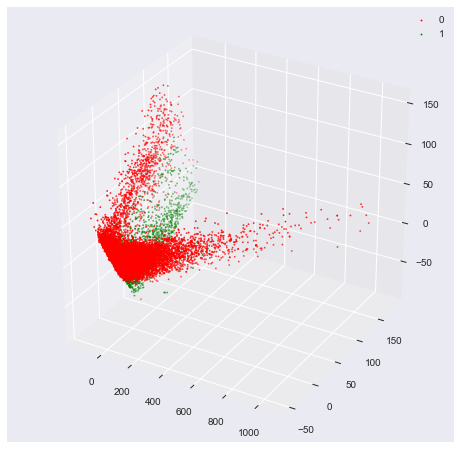

In [63]:
print('The explained variance ratio is {0:.2f}'.format(pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[0]))
fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
ax = fig.add_subplot(111, projection='3d')
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target_class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 2)
ax.legend(targets)
ax.grid()


In [64]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df['target_class']], axis = 1)
X1 = finalDf.select_dtypes(include= 'float64')
y1 = finalDf['target_class']
X_train, X_test, y_train, y_test  = train_test_split(X1, y1, test_size=0.7, random_state=1)
#Training
model = svm.SVC(kernel='linear', C=1, gamma=1) 
reg = model.fit(X_train,y_train)
#Prediction
y_pred = model.predict(X)
print('Score train set: {0:.2f}'.format(model.score(X_train,y_train)))
print('Score test set: {0:.2f}'.format(model.score(X_test,y_test)))

ValueError: X.shape[1] = 8 should be equal to 2, the number of features at training time

In [65]:
X = df.select_dtypes(include= 'float64')
y = df['target_class']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.9, random_state=1)
#Scaling
feature_scaler = StandardScaler()  
X_train = feature_scaler.fit_transform(X_train)  
X_test = feature_scaler.transform(X_test)
#Training
model = RandomForestClassifier(n_estimators=5)
reg = model.fit(X_train,y_train)
#Prediction
y_pred = model.predict(X)
y_test_pred = model.predict(X_test)
print('Score train set: {0:.2f}'.format(model.score(X_train,y_train)))
print('Score test set: {0:.2f}'.format(model.score(X_test,y_test)))

Score train set: 1.00
Score test set: 0.97


In [66]:
select = SelectFromModel(model, prefit=True, threshold=0.05)
train_x2 =select.transform(X_train)
test_x2 =select.transform(X_test)
print(train_x2.shape)
print(X_train.shape)
rfc2 = RandomForestClassifier(n_estimators=5)
rfc2 = rfc2.fit(train_x2, y_train)
pred = rfc2.predict(test_x2)
print('Score train set: {0:.2f}'.format(model.score(X_train,y_train)))
print('Score test set: {0:.2f}'.format(model.score(X_test,y_test)))

(1789, 5)
(1789, 8)
Score train set: 1.00
Score test set: 0.97


In [67]:
model.feature_importances_

array([0.33004087, 0.02991816, 0.09495334, 0.33713614, 0.02141792,
       0.09338478, 0.05481397, 0.03833482])

In [75]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=10)
kpca.fit(X_train)
kpca.transform(X)

array([[ 0.00148762, -0.05727828],
       [-0.01919611, -0.03062301],
       [-0.01698164, -0.0294006 ],
       ...,
       [-0.00566162, -0.0434089 ],
       [ 0.00074985, -0.0423967 ],
       [-0.01678088, -0.0305477 ]])

In [80]:
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)

tsne = manifold.TSNE(n_components=2, perplexity=40, n_iter=3000,init='pca')


In [82]:
X_tsne = tsne.fit_transform(X_test)
X_tsne

array([[ 99.12521  ,  33.273163 ],
       [100.97762  ,  -6.6195507],
       [ 16.330948 , -29.738043 ],
       ...,
       [ 46.661694 , -56.322086 ],
       [120.27435  ,  -7.372575 ],
       [-36.041897 , -81.10348  ]], dtype=float32)